In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
nodes = [
    { "id": "Exit_01", "type": "Exit" },
    { "id": "Exit_02", "type": "Exit" },

    { "id": "Corr_01", "type": "Corridor" },
    { "id": "Corr_02", "type": "Corridor" },
    { "id": "Corr_03", "type": "Corridor" },
    { "id": "Corr_04", "type": "Corridor" },
    { "id": "Corr_05", "type": "Corridor" },
    { "id": "Corr_06", "type": "Corridor" },
    { "id": "Corr_07", "type": "Corridor" },
    { "id": "Corr_08", "type": "Corridor" },
    { "id": "Corr_09", "type": "Corridor" },
    { "id": "Corr_10", "type": "Corridor" },
    { "id": "Corr_11", "type": "Corridor" },

    # Doors and Units 1–40
    *[
        {"id": f"Door_{i:02d}", "type": "Door"} for i in range(1, 41)
    ],
    *[
        {"id": f"Unit_{i:02d}", "type": "Unit"} for i in range(1, 41)
    ]
]

In [ ]:
edges = [
    # Exits to corridors
    { "source": "Exit_01", "target": "Corr_01" },
    { "source": "Exit_02", "target": "Corr_11" },

    # Corridors to corridors and doors
    { "source": "Corr_01", "target": "Corr_02" },
    { "source": "Corr_01", "target": "Door_40" },

    { "source": "Corr_02", "target": "Door_01" },
    { "source": "Corr_02", "target": "Door_04" },
    { "source": "Corr_02", "target": "Door_37" },
    { "source": "Corr_02", "target": "Door_38" },
    { "source": "Corr_02", "target": "Door_39" },
    { "source": "Corr_02", "target": "Corr_03" },
    { "source": "Corr_02", "target": "Corr_04" },
    { "source": "Corr_02", "target": "Door_05" },

    { "source": "Corr_03", "target": "Door_02" },
    { "source": "Corr_03", "target": "Door_03" },

    { "source": "Corr_04", "target": "Door_06" },
    { "source": "Corr_04", "target": "Door_07" },
    { "source": "Corr_04", "target": "Corr_05" },

    { "source": "Corr_05", "target": "Door_08" },
    { "source": "Corr_05", "target": "Door_09" },
    { "source": "Corr_05", "target": "Door_10" },
    { "source": "Corr_05", "target": "Door_34" },
    { "source": "Corr_05", "target": "Door_35" },
    { "source": "Corr_05", "target": "Door_36" },
    { "source": "Corr_05", "target": "Corr_06" },

    { "source": "Corr_06", "target": "Door_11" },
    { "source": "Corr_06", "target": "Door_12" },
    { "source": "Corr_06", "target": "Door_13" },
    { "source": "Corr_06", "target": "Door_14" },
    { "source": "Corr_06", "target": "Door_15" },
    { "source": "Corr_06", "target": "Door_16" },
    { "source": "Corr_06", "target": "Door_29" },
    { "source": "Corr_06", "target": "Door_30" },
    { "source": "Corr_06", "target": "Door_31" },
    { "source": "Corr_06", "target": "Door_32" },
    { "source": "Corr_06", "target": "Door_33" },
    { "source": "Corr_06", "target": "Corr_07" },

    { "source": "Corr_07", "target": "Door_17" },
    { "source": "Corr_07", "target": "Door_28" },
    { "source": "Corr_07", "target": "Corr_08" },

    { "source": "Corr_08", "target": "Door_27" },
    { "source": "Corr_08", "target": "Corr_09" },

    { "source": "Corr_09", "target": "Door_25" },
    { "source": "Corr_09", "target": "Door_26" },
    { "source": "Corr_09", "target": "Door_18" },
    { "source": "Corr_09", "target": "Door_19" },
    { "source": "Corr_09", "target": "Door_20" },
    { "source": "Corr_09", "target": "Door_21" },
    { "source": "Corr_09", "target": "Corr_10" },

    { "source": "Corr_10", "target": "Door_22" },
    { "source": "Corr_10", "target": "Door_24" },
    { "source": "Corr_10", "target": "Corr_11" },

    { "source": "Corr_11", "target": "Door_23" },

    # Door to Unit connections
    *[
        {"source": f"Door_{i:02d}", "target": f"Unit_{i:02d}"}
        for i in range(1, 41)
    ]
]

In [ ]:
G = nx.Graph()

for node in nodes:
    G.add_node(node["id"], **node)

for edge in edges:
    G.add_edge(edge["source"], edge["target"])

In [ ]:
pos = nx.spring_layout(G, seed=42, k=1.3)

In [ ]:
# Color and size mapping
color_map = []
size_map = []

for node in G.nodes(data=True):
    ntype = node[1].get("type", "Unknown")

    if ntype == "Exit":
        color_map.append("red")
        size_map.append(900)
    elif ntype == "Corridor":
        color_map.append("skyblue")
        size_map.append(500)
    elif ntype == "Door":
        color_map.append("orange")
        size_map.append(300)
    elif ntype == "Unit":
        color_map.append("green")
        size_map.append(300)
    else:
        color_map.append("gray")
        size_map.append(200)

<ipython-input-20-e40e818e48a2>:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


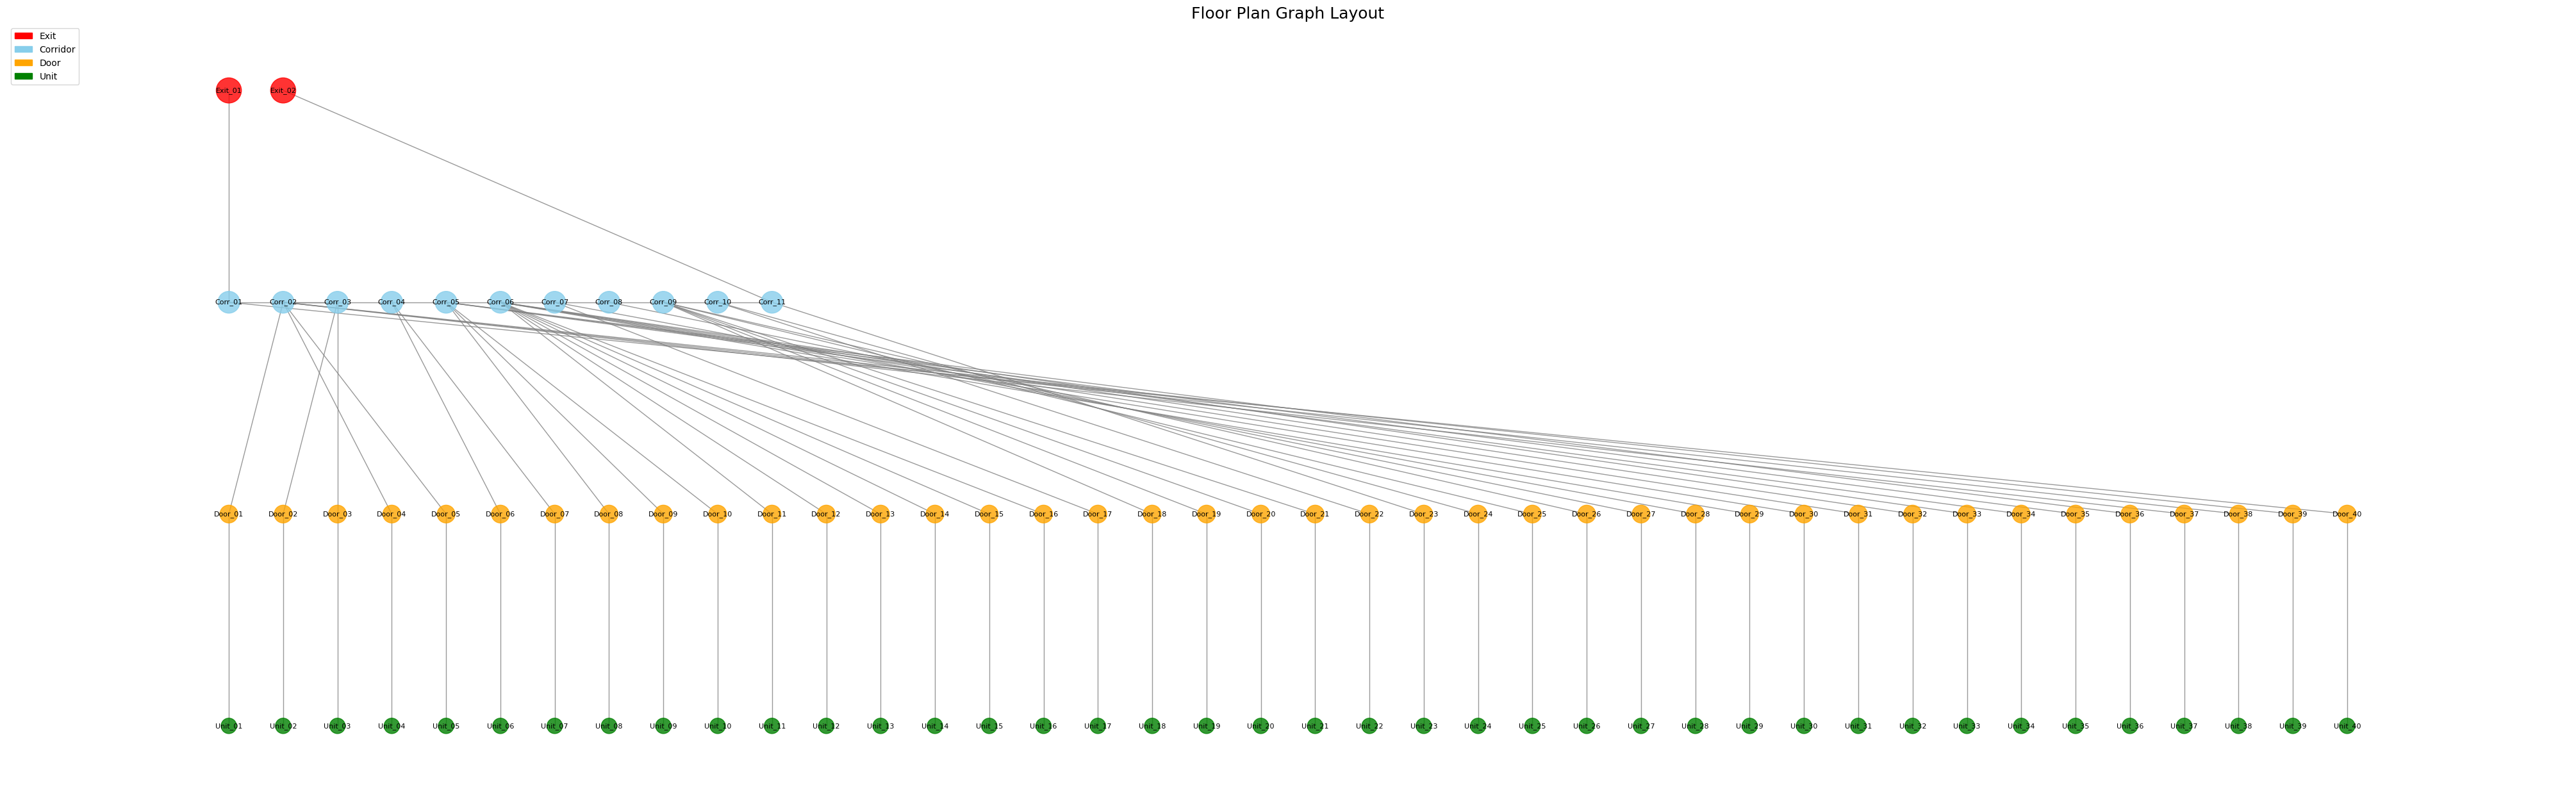

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Build Graph from nodes & edges ---
G = nx.Graph()

# Add nodes with attributes
for node in nodes:
    G.add_node(node["id"], **node)

# Add edges
for edge in edges:
    G.add_edge(edge["source"], edge["target"])

# --- 2. Custom layered layout ---
layer_y = {
    "Exit": 0,
    "Corridor": 1,
    "Door": 2,
    "Unit": 3
}

# X positions by type
type_counts = {t: 0 for t in layer_y}
spacing = 2.5

pos = {}
for node, data in G.nodes(data=True):
    ntype = data["type"]
    x = type_counts[ntype] * spacing
    y = -layer_y[ntype] * spacing
    pos[node] = (x, y)
    type_counts[ntype] += 1

# --- 3. Style nodes ---
color_map = []
size_map = []
labels = {}

for node, data in G.nodes(data=True):
    ntype = data["type"]
    labels[node] = node

    if ntype == "Exit":
        color_map.append("red")
        size_map.append(800)
    elif ntype == "Corridor":
        color_map.append("skyblue")
        size_map.append(600)
    elif ntype == "Door":
        color_map.append("orange")
        size_map.append(400)
    elif ntype == "Unit":
        color_map.append("green")
        size_map.append(300)
    else:
        color_map.append("gray")
        size_map.append(200)

# --- 4. Draw the graph ---
plt.figure(figsize=(40, 12))

nx.draw(
    G,
    pos,
    node_color=color_map,
    node_size=size_map,
    edge_color="gray",
    width=1.0,
    alpha=0.8,
    with_labels=False
)

nx.draw_networkx_labels(
    G,
    pos,
    labels=labels,
    font_size=8,
    font_color="black"
)

plt.title("Floor Plan Graph Layout", fontsize=18)
plt.axis("off")

# --- 5. Add legend ---
import matplotlib.patches as mpatches

legend_elements = [
    mpatches.Patch(color="red", label="Exit"),
    mpatches.Patch(color="skyblue", label="Corridor"),
    mpatches.Patch(color="orange", label="Door"),
    mpatches.Patch(color="green", label="Unit")
]

plt.legend(handles=legend_elements, loc="upper left", fontsize=10)

plt.tight_layout()
plt.savefig("floor_plan_graph.jpg", format="jpg", dpi=300)
plt.show()

<ipython-input-25-c3f1059bbc33>:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


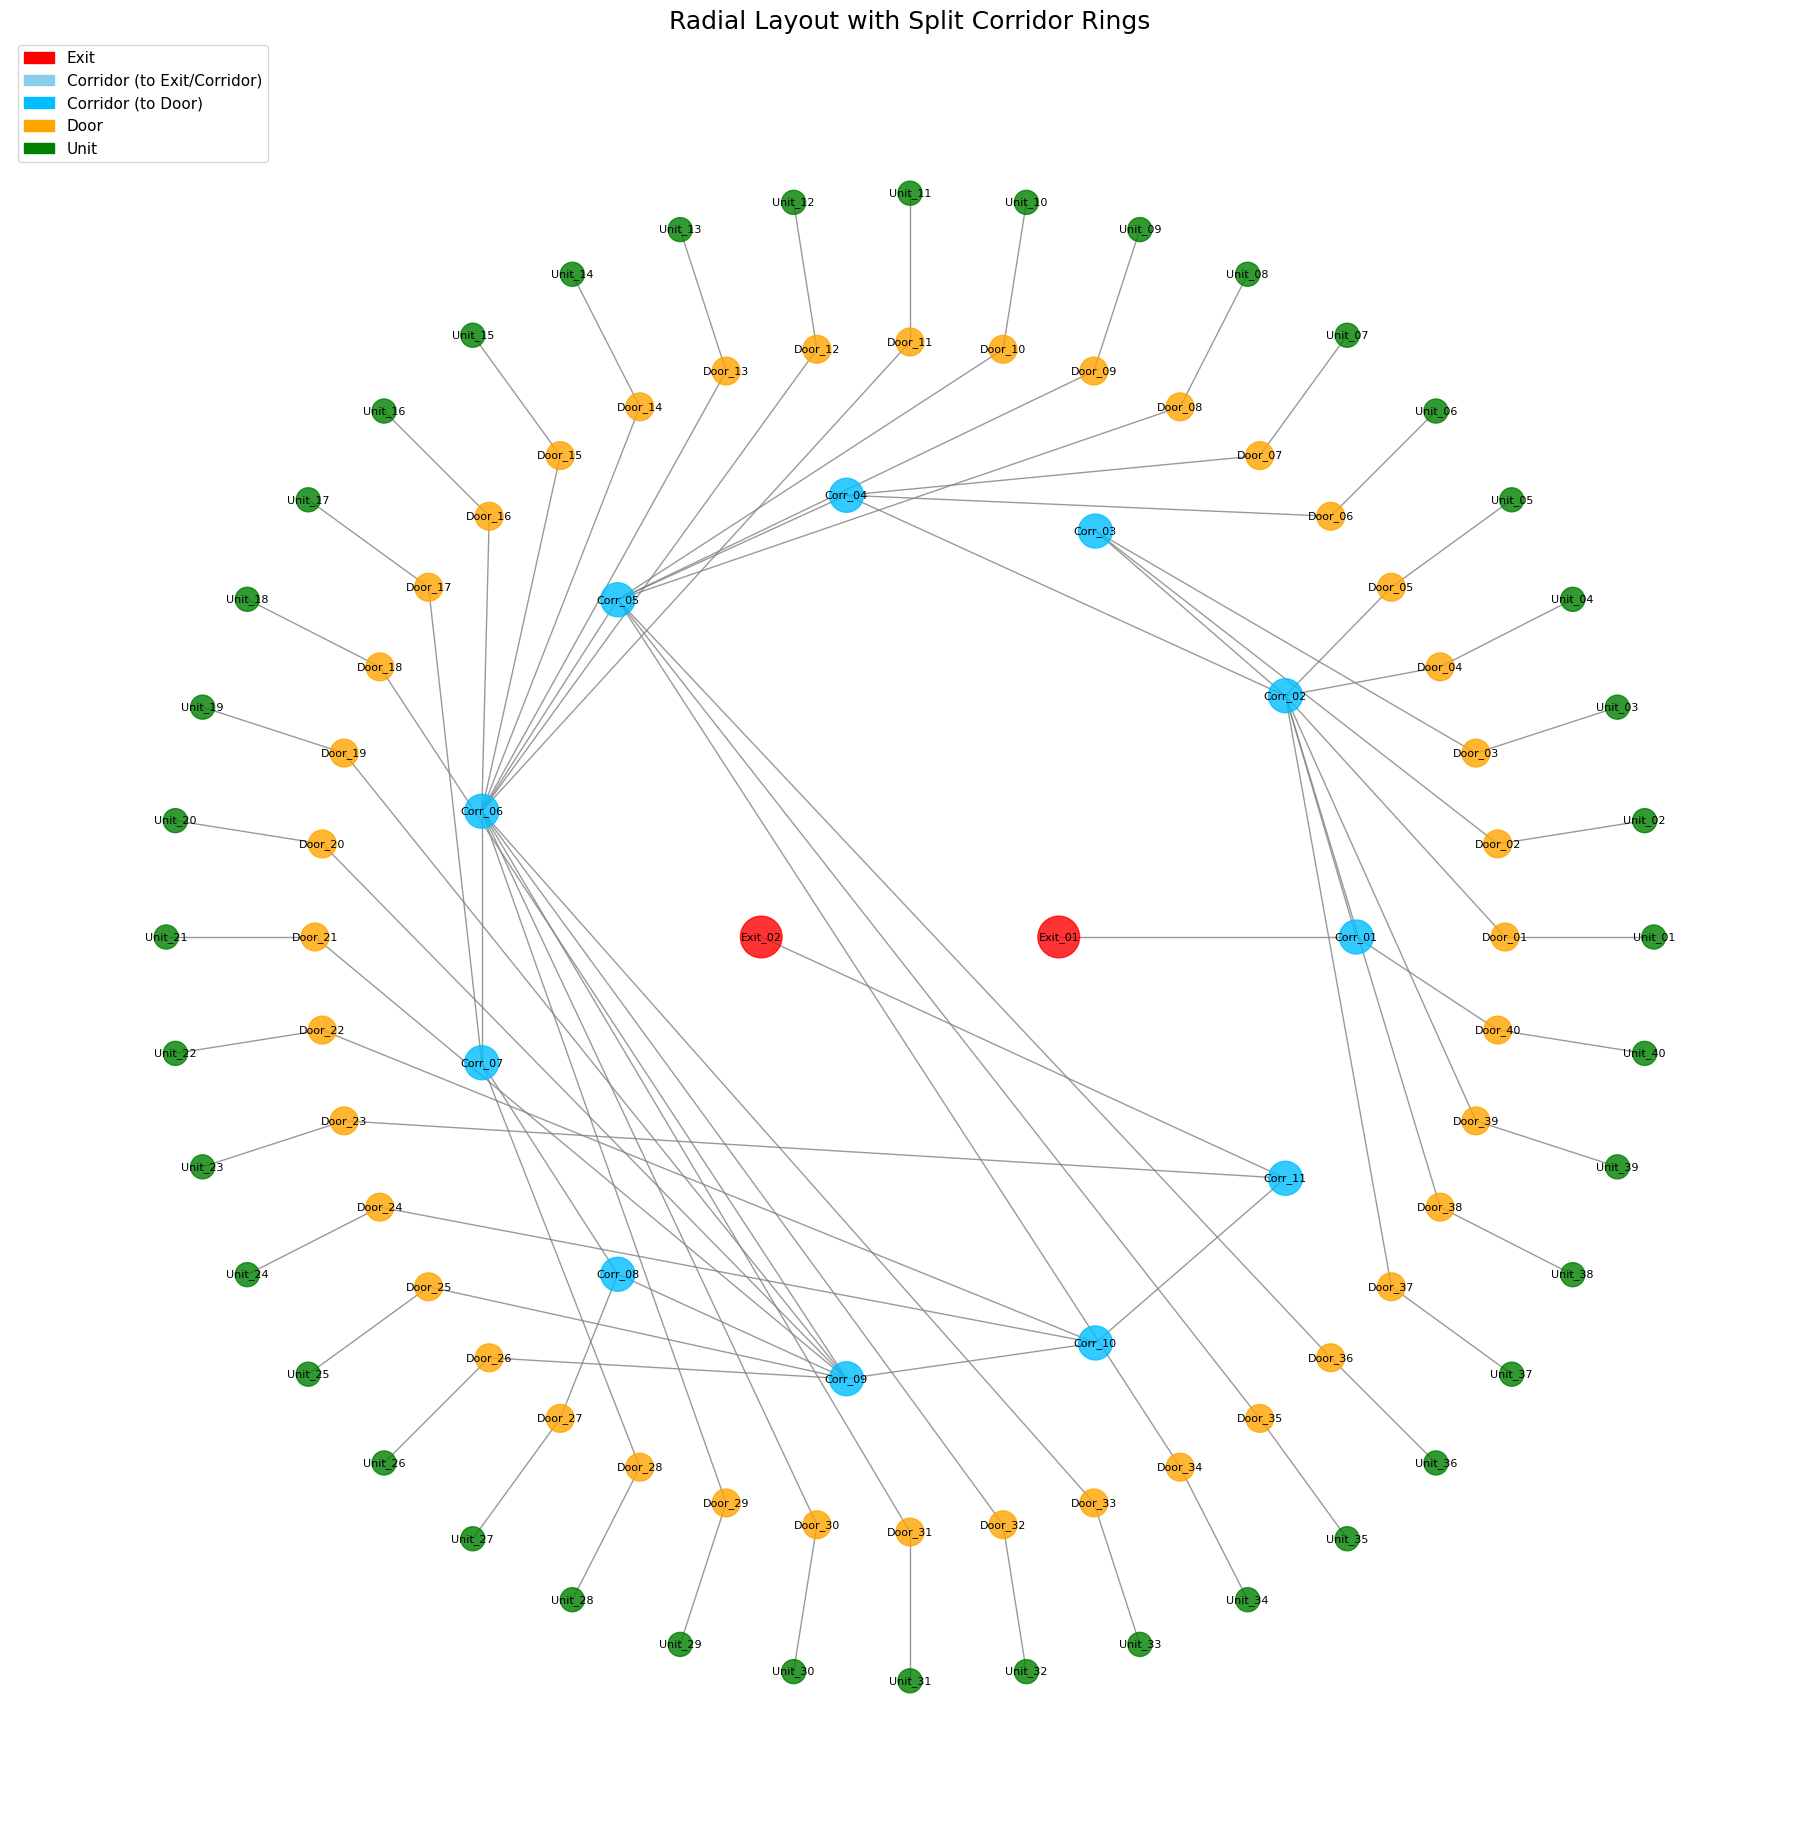

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# --- 1. Build the graph ---
G = nx.Graph()
for node in nodes:
    G.add_node(node["id"], **node)
for edge in edges:
    G.add_edge(edge["source"], edge["target"])

# --- 2. Classify nodes by type ---
layers = {
    "Exit": [],
    "Corridor_A": [],  # connected to exits or corridors
    "Corridor_B": [],  # connected to doors
    "Door": [],
    "Unit": []
}

# Split corridors into A and B
for node, data in G.nodes(data=True):
    if data["type"] == "Exit":
        layers["Exit"].append(node)
    elif data["type"] == "Corridor":
        neighbors = list(G.neighbors(node))
        types = [G.nodes[n]["type"] for n in neighbors]
        if "Door" in types:
            layers["Corridor_B"].append(node)
        else:
            layers["Corridor_A"].append(node)
    elif data["type"] == "Door":
        layers["Door"].append(node)
    elif data["type"] == "Unit":
        layers["Unit"].append(node)

# --- 3. Function to layout a ring ---
def layout_circle(nodes, radius, center=(0, 0), start_angle=0):
    pos = {}
    n = len(nodes)
    for i, node in enumerate(nodes):
        angle = start_angle + 2 * np.pi * i / max(n, 1)
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        pos[node] = (x, y)
    return pos

# --- 4. Build layered positions ---
spacing = 3.5
center = (0, 0)
pos = {}

pos.update(layout_circle(layers["Exit"], radius=spacing * 1, center=center))
pos.update(layout_circle(layers["Corridor_A"], radius=spacing * 2, center=center))
pos.update(layout_circle(layers["Corridor_B"], radius=spacing * 3, center=center))
pos.update(layout_circle(layers["Door"], radius=spacing * 4, center=center))
pos.update(layout_circle(layers["Unit"], radius=spacing * 5, center=center))

# --- 5. Style nodes ---
color_map = []
size_map = []
labels = {}

for node, data in G.nodes(data=True):
    labels[node] = node
    ntype = data["type"]

    if ntype == "Exit":
        color_map.append("red")
        size_map.append(900)
    elif ntype == "Corridor":
        if node in layers["Corridor_A"]:
            color_map.append("skyblue")
            size_map.append(600)
        elif node in layers["Corridor_B"]:
            color_map.append("deepskyblue")
            size_map.append(600)
    elif ntype == "Door":
        color_map.append("orange")
        size_map.append(400)
    elif ntype == "Unit":
        color_map.append("green")
        size_map.append(300)
    else:
        color_map.append("grey")
        size_map.append(200)

# --- 6. Plot ---
plt.figure(figsize=(18, 18))
nx.draw(
    G,
    pos,
    node_color=color_map,
    node_size=size_map,
    edge_color="gray",
    width=1.0,
    alpha=0.8,
    with_labels=False
)

nx.draw_networkx_labels(
    G,
    pos,
    labels=labels,
    font_size=8,
    font_color="black"
)

# --- 7. Legend ---
legend_elements = [
    mpatches.Patch(color="red", label="Exit"),
    mpatches.Patch(color="skyblue", label="Corridor (to Exit/Corridor)"),
    mpatches.Patch(color="deepskyblue", label="Corridor (to Door)"),
    mpatches.Patch(color="orange", label="Door"),
    mpatches.Patch(color="green", label="Unit")
]
plt.legend(handles=legend_elements, loc="upper left", fontsize=11)

plt.title("Radial Layout", fontsize=18)
plt.axis("off")

# --- 8. Save to JPG ---
plt.tight_layout()
plt.savefig("radial_corridor_split.jpg", format="jpg", dpi=300)
plt.show()

<ipython-input-27-d4bdcc204c4f>:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


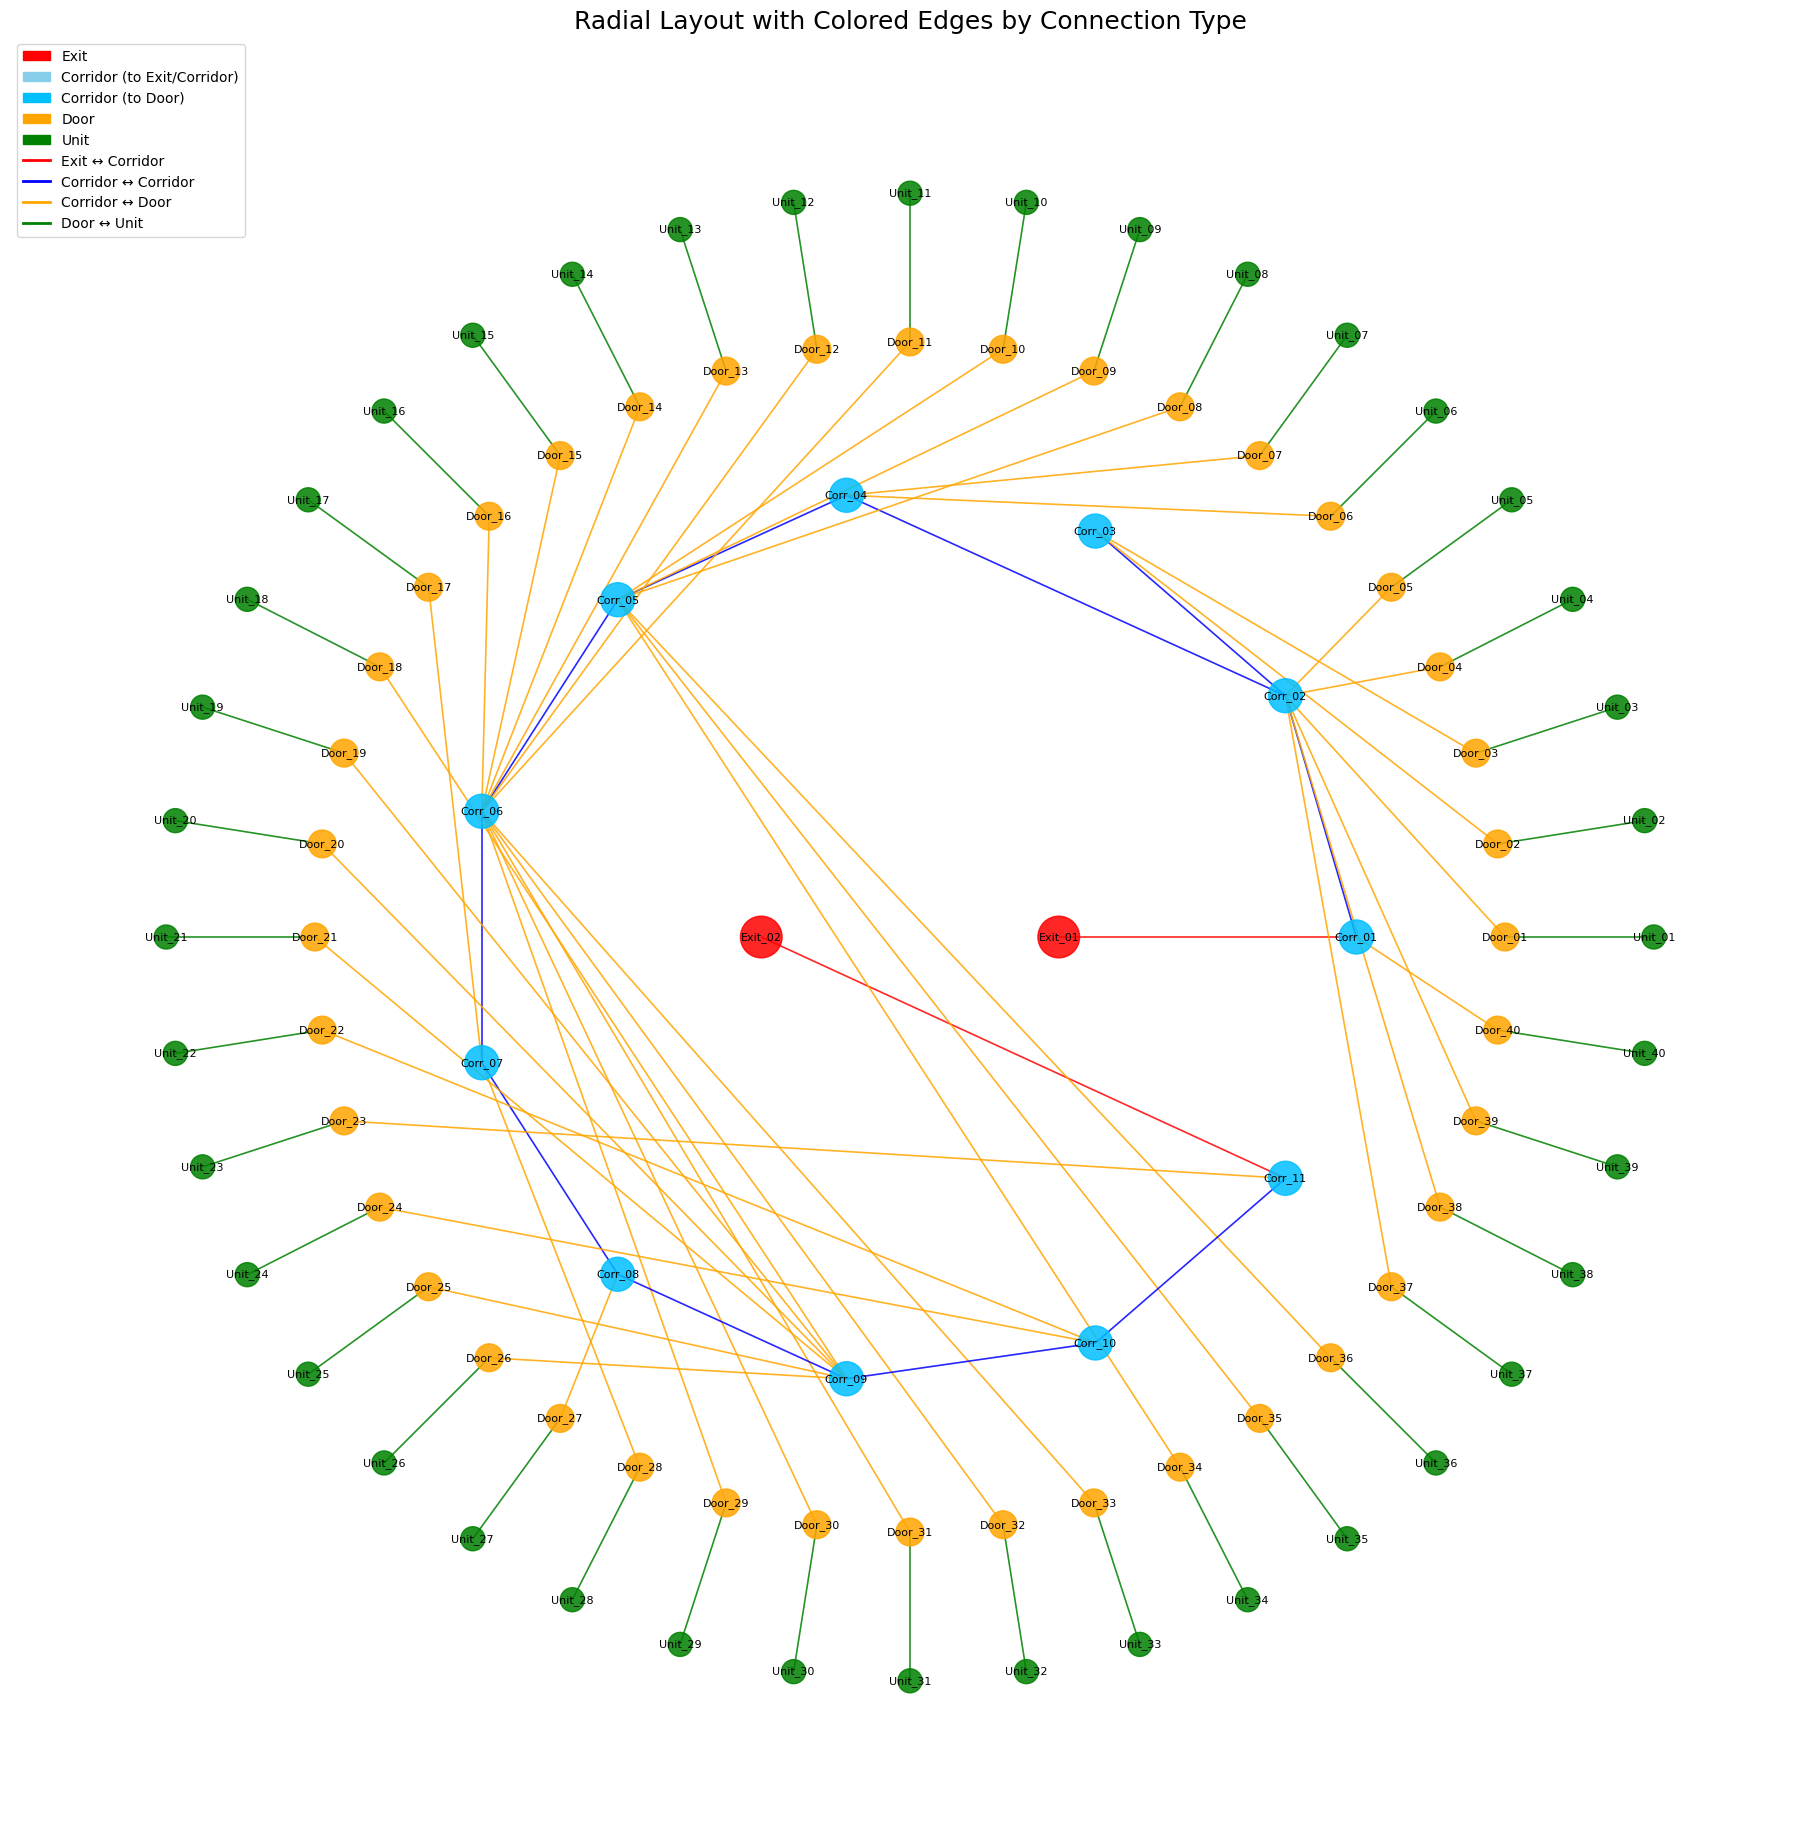

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# --- 1. Build graph ---
G = nx.Graph()
for node in nodes:
    G.add_node(node["id"], **node)
for edge in edges:
    G.add_edge(edge["source"], edge["target"])

# --- 2. Classify nodes into layers ---
layers = {
    "Exit": [],
    "Corridor_A": [],
    "Corridor_B": [],
    "Door": [],
    "Unit": []
}

for node, data in G.nodes(data=True):
    if data["type"] == "Exit":
        layers["Exit"].append(node)
    elif data["type"] == "Corridor":
        neighbors = list(G.neighbors(node))
        neighbor_types = [G.nodes[n]["type"] for n in neighbors]
        if "Door" in neighbor_types:
            layers["Corridor_B"].append(node)
        else:
            layers["Corridor_A"].append(node)
    elif data["type"] == "Door":
        layers["Door"].append(node)
    elif data["type"] == "Unit":
        layers["Unit"].append(node)

# --- 3. Layout each ring ---
def layout_circle(nodes, radius, center=(0, 0), start_angle=0):
    pos = {}
    n = len(nodes)
    for i, node in enumerate(nodes):
        angle = start_angle + 2 * np.pi * i / max(n, 1)
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        pos[node] = (x, y)
    return pos

spacing = 3.5
center = (0, 0)
pos = {}
pos.update(layout_circle(layers["Exit"], radius=spacing * 1, center=center))
pos.update(layout_circle(layers["Corridor_A"], radius=spacing * 2, center=center))
pos.update(layout_circle(layers["Corridor_B"], radius=spacing * 3, center=center))
pos.update(layout_circle(layers["Door"], radius=spacing * 4, center=center))
pos.update(layout_circle(layers["Unit"], radius=spacing * 5, center=center))

# --- 4. Node styles ---
color_map = []
size_map = []
labels = {}

for node, data in G.nodes(data=True):
    labels[node] = node
    ntype = data["type"]
    if ntype == "Exit":
        color_map.append("red")
        size_map.append(900)
    elif ntype == "Corridor":
        if node in layers["Corridor_A"]:
            color_map.append("skyblue")
        else:
            color_map.append("deepskyblue")
        size_map.append(600)
    elif ntype == "Door":
        color_map.append("orange")
        size_map.append(400)
    elif ntype == "Unit":
        color_map.append("green")
        size_map.append(300)
    else:
        color_map.append("gray")
        size_map.append(200)

# --- 5. Edge coloring by type ---
def edge_color(u, v):
    types = {G.nodes[u]["type"], G.nodes[v]["type"]}
    if types == {"Exit", "Corridor"}:
        return "red"
    elif types == {"Corridor"}:
        return "blue"
    elif types == {"Corridor", "Door"}:
        return "orange"
    elif types == {"Door", "Unit"}:
        return "green"
    else:
        return "gray"

edge_colors = [edge_color(u, v) for u, v in G.edges()]

# --- 6. Draw ---
plt.figure(figsize=(18, 18))
nx.draw(
    G,
    pos,
    node_color=color_map,
    node_size=size_map,
    edge_color=edge_colors,
    width=1.2,
    alpha=0.85,
    with_labels=False
)

nx.draw_networkx_labels(
    G,
    pos,
    labels=labels,
    font_size=8,
    font_color="black"
)

# --- 7. Legend ---
node_legend = [
    mpatches.Patch(color="red", label="Exit"),
    mpatches.Patch(color="skyblue", label="Corridor (to Exit/Corridor)"),
    mpatches.Patch(color="deepskyblue", label="Corridor (to Door)"),
    mpatches.Patch(color="orange", label="Door"),
    mpatches.Patch(color="green", label="Unit"),
]

edge_legend = [
    Line2D([0], [0], color="red", lw=2, label="Exit ↔ Corridor"),
    Line2D([0], [0], color="blue", lw=2, label="Corridor ↔ Corridor"),
    Line2D([0], [0], color="orange", lw=2, label="Corridor ↔ Door"),
    Line2D([0], [0], color="green", lw=2, label="Door ↔ Unit"),
]

plt.legend(handles=node_legend + edge_legend, loc="upper left", fontsize=10)

plt.title("Radial Layout with Colored Edges by Connection Type", fontsize=18)
plt.axis("off")

# --- 8. Save to file ---
plt.tight_layout()
plt.savefig("radial_colored_edges.jpg", format="jpg", dpi=300)
plt.show()